# Lecture 1 Vacuum Rabi oscillations in the Jaynes-Cummings model

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = "Arial"

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

# Introduction

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form)

### $H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$

or with the rotating-wave approximation

### $H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$

where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.

### Problem parameters


Here we use units where $\hbar = 1$: 

In [3]:
wc = 1 * 2 * np.pi  # cavity frequency
wa = 1  * 2 * np.pi  # atom frequency
g  = 0.5* 2 * np.pi  # coupling strength
kappa = 0       # cavity dissipation rate
gamma = 0        # atom dissipation rate
N = 15              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,10001)

### Setup the operators, the Hamiltonian and initial state

In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
H_rwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

### Create a list of collapse operators that describe the dissipation

In [5]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

### Evolve the system

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$ and $\sigma_+\sigma_-$ are returned by the solver by passing the list `[a.dag()*a, sm.dag()*sm]` as the fifth argument to the solver.

In [6]:
output_rwa = mesolve(H_rwa, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

## Visualize the results

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the `mesolve` above). We can clearly see how energy is being coherently transferred back and forth between the cavity and the atom.

(0.0, 1.0)

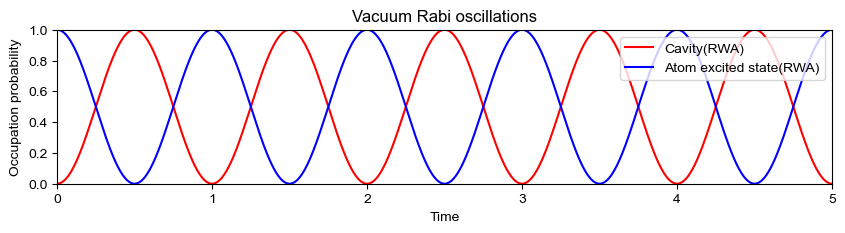

In [7]:
n_c_rwa = output_rwa.expect[0]
n_a_rwa = output_rwa.expect[1]
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,2))

axes.plot(tlist, n_c_rwa, label="Cavity(RWA)",color="red")
axes.plot(tlist, n_a_rwa, label="Atom excited state(RWA)",color="blue")
# axes.plot(tlist, n_c, label="Cavity",color="orange")
# axes.plot(tlist, n_a, label="Atom excited state",color="purple")
axes.legend(loc=1)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')
axes.set_xlim(0,5)
axes.set_ylim(0,1)